In [84]:
import pandas as pd
climate_disaster = pd.read_csv("The Climate Change Twitter Dataset.csv",na_values="?")

In [85]:
climate_disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   created_at       1048575 non-null  object 
 1   id               1048575 non-null  float64
 2   lng              312693 non-null   float64
 3   lat              312693 non-null   float64
 4   topic            1048575 non-null  object 
 5   sentiment        1048575 non-null  float64
 6   stance           1048575 non-null  object 
 7   gender           1048575 non-null  object 
 8   temperature_avg  312693 non-null   float64
 9   aggressiveness   1048575 non-null  object 
dtypes: float64(5), object(5)
memory usage: 80.0+ MB


In [86]:
climate_disaster.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132.0,NaN,NaN,Weather Extremes,-0.10,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275.0,-73.95,40.65,Weather Extremes,0.58,neutral,undefined,-1.11,aggressive
2,2006-08-29 01:52:30+00:00,23160.0,NaN,NaN,Weather Extremes,0.50,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868.0,NaN,NaN,Weather Extremes,0.03,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553.0,NaN,NaN,Importance of Human Intervantion,-0.09,neutral,male,NaN,aggressive


In [87]:
climate_disaster.dtypes

created_at          object
id                 float64
lng                float64
lat                float64
topic               object
sentiment          float64
stance              object
gender              object
temperature_avg    float64
aggressiveness      object
dtype: object

# New Section

In [88]:
#climate_disaster = climate_disaster.rename(columns=climate_disaster.iloc[0]).drop(climate_disaster.index[0])

In [89]:
#Dropping ID column as it is not necessary for the Data mining
climate_disaster = climate_disaster.drop(['id'],axis=1)

In [90]:
#Dropping Gender column as it is not necessary for the Data mining
climate_disaster = climate_disaster.drop(['gender'],axis=1)

In [91]:
#Checking for the null columns in topic column
climate_disaster['topic'].isna().sum()

0

In [92]:
#Checking for the null columns in Aggressiveness column
climate_disaster['aggressiveness'].isna().sum()

0

In [93]:
climate_disaster

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,NaN,NaN,Weather Extremes,-0.10,neutral,NaN,aggressive
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,aggressive
2,2006-08-29 01:52:30+00:00,NaN,NaN,Weather Extremes,0.50,neutral,NaN,aggressive
3,2006-11-07 02:46:52+00:00,NaN,NaN,Weather Extremes,0.03,neutral,NaN,aggressive
4,2006-11-27 14:27:43+00:00,NaN,NaN,Importance of Human Intervantion,-0.09,neutral,NaN,aggressive
...,...,...,...,...,...,...,...,...
1048570,2011-03-29 10:04:40+00:00,NaN,NaN,Ideological Positions on Global Warming,-0.52,believer,NaN,not aggressive
1048571,2011-03-29 10:04:41+00:00,NaN,NaN,Ideological Positions on Global Warming,-0.17,neutral,NaN,not aggressive
1048572,2011-03-29 10:06:59+00:00,NaN,NaN,Ideological Positions on Global Warming,0.54,neutral,NaN,not aggressive
1048573,2011-03-29 10:07:53+00:00,0.01,51.55,Donald Trump versus Science,0.62,neutral,1.70,not aggressive


In [94]:
climate_disaster = climate_disaster.dropna()

In [95]:
climate_disaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312693 entries, 1 to 1048573
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       312693 non-null  object 
 1   lng              312693 non-null  float64
 2   lat              312693 non-null  float64
 3   topic            312693 non-null  object 
 4   sentiment        312693 non-null  float64
 5   stance           312693 non-null  object 
 6   temperature_avg  312693 non-null  float64
 7   aggressiveness   312693 non-null  object 
dtypes: float64(4), object(4)
memory usage: 21.5+ MB


In [97]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoding_cols = ['aggressiveness']

lbl_encoder = LabelEncoder()

for col in label_encoding_cols:
  climate_disaster[col]= lbl_encoder.fit_transform(climate_disaster[col])

print(climate_disaster.shape)
climate_disaster

(312693, 8)


C:\Users\Checkout\AppData\Local\Temp\ipykernel_7188\2203126523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_disaster[col]= lbl_encoder.fit_transform(climate_disaster[col])


,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0
...,...,...,...,...,...,...,...,...
1048528,2011-03-29 08:23:23+00:00,144.96,-37.81,Seriousness of Gas Emissions,-0.41,denier,1.82,1
1048533,2011-03-29 08:42:01+00:00,110.83,-7.57,Ideological Positions on Global Warming,0.45,neutral,-0.25,1
1048551,2011-03-29 09:21:17+00:00,121.07,14.53,Weather Extremes,0.54,neutral,-1.24,1
1048558,2011-03-29 09:44:21+00:00,1.16,52.06,Seriousness of Gas Emissions,0.06,neutral,1.06,1


In [ ]:
#Using OneHotEncoder Method for Encoding Topic column 
#from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'topic' column 
#encoder_df = pd.DataFrame(encoder.fit_transform(climate_disaster[['topic']]).toarray())

#merge one-hot encoded columns back with original DataFrame

#climate_disaster = climate_disaster.join(encoder_df)

#view final df
#print(climate_disaster)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'aggressiveness' column 
#encoder_df = pd.DataFrame(encoder.fit_transform(climate_disaster[['aggressiveness']]).toarray())

#merge one-hot encoded columns back with original DataFrame
#final_df = climate_disaster.join(encoder_df)

#view final df
#print(final_df)

#drop 'aggressiveness' column
#final_df.drop('aggressiveness', axis=1, inplace=True)

In [98]:
climate_disaster['stance'].isna().sum()

0

In [ ]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#label_encoding_cols = ['stance']

#lbl_encoder = LabelEncoder()

#for col in label_encoding_cols:
#  climate_disaster[col]= lbl_encoder.fit_transform(climate_disaster[col])

#print(climate_disaster.shape)
#climate_disaster


In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'stance' column 
#encoder_dff = pd.DataFrame(encoder.fit_transform(climate_disaster[['stance']]).toarray())

#merge one-hot encoded columns back with original DataFrame
#final_dff = climate_disaster.join(encoder_dff)

#view final df
#print(final_dff)

#drop 'aggressiveness' column
#final_dff.drop('stance', axis=1, inplace=True)

In [99]:
climate_disaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312693 entries, 1 to 1048573
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       312693 non-null  object 
 1   lng              312693 non-null  float64
 2   lat              312693 non-null  float64
 3   topic            312693 non-null  object 
 4   sentiment        312693 non-null  float64
 5   stance           312693 non-null  object 
 6   temperature_avg  312693 non-null  float64
 7   aggressiveness   312693 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.5+ MB


In [100]:
climate_disaster

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0
...,...,...,...,...,...,...,...,...
1048528,2011-03-29 08:23:23+00:00,144.96,-37.81,Seriousness of Gas Emissions,-0.41,denier,1.82,1
1048533,2011-03-29 08:42:01+00:00,110.83,-7.57,Ideological Positions on Global Warming,0.45,neutral,-0.25,1
1048551,2011-03-29 09:21:17+00:00,121.07,14.53,Weather Extremes,0.54,neutral,-1.24,1
1048558,2011-03-29 09:44:21+00:00,1.16,52.06,Seriousness of Gas Emissions,0.06,neutral,1.06,1


In [101]:
climate_disaster['lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, climate_disaster[['lat', 'lng']].values)]
climate_disaster

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7188\830162746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_disaster['lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, climate_disaster[['lat', 'lng']].values)]


,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness,lat_long
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0,"40.65, -73.95"
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0,"37.77, -122.42"
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0,"36.07, -79.79"
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1,"38.0, -121.81"
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0,"52.48, -1.9"
...,...,...,...,...,...,...,...,...,...
1048528,2011-03-29 08:23:23+00:00,144.96,-37.81,Seriousness of Gas Emissions,-0.41,denier,1.82,1,"-37.81, 144.96"
1048533,2011-03-29 08:42:01+00:00,110.83,-7.57,Ideological Positions on Global Warming,0.45,neutral,-0.25,1,"-7.57, 110.83"
1048551,2011-03-29 09:21:17+00:00,121.07,14.53,Weather Extremes,0.54,neutral,-1.24,1,"14.53, 121.07"
1048558,2011-03-29 09:44:21+00:00,1.16,52.06,Seriousness of Gas Emissions,0.06,neutral,1.06,1,"52.06, 1.16"


In [102]:
climate_disaster = climate_disaster.dropna(subset=['lat', 'lng'])
climate_disaster

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness,lat_long
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0,"40.65, -73.95"
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0,"37.77, -122.42"
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0,"36.07, -79.79"
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1,"38.0, -121.81"
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0,"52.48, -1.9"
...,...,...,...,...,...,...,...,...,...
1048528,2011-03-29 08:23:23+00:00,144.96,-37.81,Seriousness of Gas Emissions,-0.41,denier,1.82,1,"-37.81, 144.96"
1048533,2011-03-29 08:42:01+00:00,110.83,-7.57,Ideological Positions on Global Warming,0.45,neutral,-0.25,1,"-7.57, 110.83"
1048551,2011-03-29 09:21:17+00:00,121.07,14.53,Weather Extremes,0.54,neutral,-1.24,1,"14.53, 121.07"
1048558,2011-03-29 09:44:21+00:00,1.16,52.06,Seriousness of Gas Emissions,0.06,neutral,1.06,1,"52.06, 1.16"


In [103]:
climate_head=climate_disaster.head()
climate_head

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness,lat_long
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0,"40.65, -73.95"
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0,"37.77, -122.42"
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0,"36.07, -79.79"
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1,"38.0, -121.81"
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0,"52.48, -1.9"


In [78]:
# from geopy.extra.rate_limiter import RateLimiter
# from geopy.geocoders import Nominatim
# import pandas as pd
# geolocator = Nominatim(user_agent="user_agent")
# # add rate limit
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
# state_list = [] # Initialize empty dict
# # get location coordinates
# geo_loc  = climate_disaster.lat_long.values
# for cord in geo_loc:
#     # send request
#     location = reverse(cord, addressdetails=True)
#     # get state value
#     state = location.raw["address"].get("state")
#     # store state value
#     state_list.append(state)
# # assign back states
# climate_disaster['states'] = state_list
# print(climate_disaster)

KeyboardInterrupt: 

In [104]:
climate_disaster.to_csv('Final_Twitter_output.csv', index=False)

### Check in - 3

In [105]:
climate_disaster

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness,lat_long
1,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,0,"40.65, -73.95"
7,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,0,"37.77, -122.42"
8,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,0,"36.07, -79.79"
9,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,1,"38.0, -121.81"
11,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,0,"52.48, -1.9"
...,...,...,...,...,...,...,...,...,...
1048528,2011-03-29 08:23:23+00:00,144.96,-37.81,Seriousness of Gas Emissions,-0.41,denier,1.82,1,"-37.81, 144.96"
1048533,2011-03-29 08:42:01+00:00,110.83,-7.57,Ideological Positions on Global Warming,0.45,neutral,-0.25,1,"-7.57, 110.83"
1048551,2011-03-29 09:21:17+00:00,121.07,14.53,Weather Extremes,0.54,neutral,-1.24,1,"14.53, 121.07"
1048558,2011-03-29 09:44:21+00:00,1.16,52.06,Seriousness of Gas Emissions,0.06,neutral,1.06,1,"52.06, 1.16"


In [106]:
climate_disaster_sub = climate_disaster[['topic','stance']]

In [107]:
climate_disaster_sub

,topic,stance
1,Weather Extremes,neutral
7,Ideological Positions on Global Warming,neutral
8,Weather Extremes,denier
9,Weather Extremes,neutral
11,Weather Extremes,neutral
...,...,...
1048528,Seriousness of Gas Emissions,denier
1048533,Ideological Positions on Global Warming,neutral
1048551,Weather Extremes,neutral
1048558,Seriousness of Gas Emissions,neutral


In [108]:
## Mapping the stane column to numeric
stance_dict = {'believer' : 1,
                'neutral' : 0,
                'denier' : -1,
                }


climate_disaster_sub['stance'] = climate_disaster_sub['stance'].map(stance_dict )

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7188\3478118076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_disaster_sub['stance'] = climate_disaster_sub['stance'].map(stance_dict )


In [109]:
## Making a datframe of 
#  Topic and stance column

climate_disaster_sub

,topic,stance
1,Weather Extremes,0
7,Ideological Positions on Global Warming,0
8,Weather Extremes,-1
9,Weather Extremes,0
11,Weather Extremes,0
...,...,...
1048528,Seriousness of Gas Emissions,-1
1048533,Ideological Positions on Global Warming,0
1048551,Weather Extremes,0
1048558,Seriousness of Gas Emissions,0


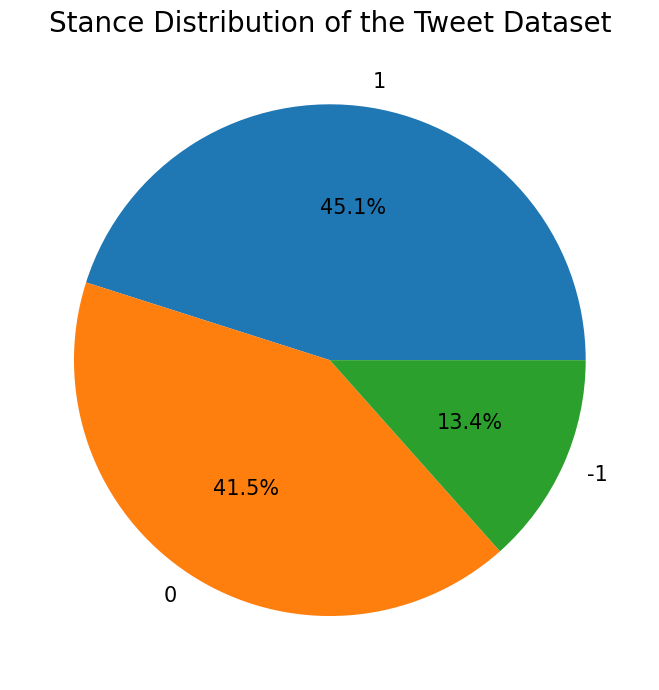

In [110]:
##Plotting pie chart of Stance values

import math
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
plt.figure(figsize = (7, 7))
plt.pie(climate_disaster_sub.stance.value_counts().values, labels = climate_disaster_sub.stance.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Stance Distribution of the Tweet Dataset', fontsize=20)
plt.tight_layout()
plt.show()